In [62]:
import numpy as np
import pandas as pd 

In [23]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
data = pd.read_csv("/content/student-mat-pass-or-fail.csv")     
data.shape      #Size of data

(395, 30)

In [25]:
data.head(395)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,pass
0,1,1,18,1,0,0,4,4,2,2,...,3,4,1,1,3,6,5,6,6,0
1,1,1,17,1,0,1,1,1,1,2,...,3,3,1,1,3,4,5,5,6,0
2,1,1,15,1,1,1,1,1,1,2,...,3,2,2,3,3,10,7,8,10,1
3,1,1,15,1,0,1,4,2,1,3,...,2,2,1,1,5,2,15,14,15,1
4,1,1,16,1,0,1,3,3,1,2,...,3,2,1,2,5,4,6,10,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,0,20,1,1,0,2,2,1,2,...,5,4,4,5,4,11,9,9,9,0
391,0,0,17,1,1,1,3,1,2,1,...,4,5,3,4,2,3,14,16,16,1
392,0,0,21,0,0,1,1,1,1,1,...,5,3,3,3,3,3,10,8,7,0
393,0,0,18,0,1,1,3,2,3,1,...,4,1,3,4,5,0,11,12,10,1


In [26]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'pass'],
      dtype='object')

In [27]:
#checking missing values in the data
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
pass          0
dtype: int64

In [28]:
data.describe

<bound method NDFrame.describe of      school  sex  age  address  famsize  Pstatus  Medu  Fedu  traveltime  \
0         1    1   18        1        0        0     4     4           2   
1         1    1   17        1        0        1     1     1           1   
2         1    1   15        1        1        1     1     1           1   
3         1    1   15        1        0        1     4     2           1   
4         1    1   16        1        0        1     3     3           1   
..      ...  ...  ...      ...      ...      ...   ...   ...         ...   
390       0    0   20        1        1        0     2     2           1   
391       0    0   17        1        1        1     3     1           2   
392       0    0   21        0        0        1     1     1           1   
393       0    0   18        0        1        1     3     2           3   
394       0    0   19        1        1        1     1     1           1   

     studytime  ...  freetime  goout  Dalc  Walc  hea

In [30]:
#seperating independent and dependent variables
y = data['school']
X = data.drop(['school'], axis=1)

In [10]:
#importing train_test_split to create validation set
from sklearn.model_selection import train_test_split

In [36]:
#creating the train and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 100, stratify=y, test_size=0.25)

In [37]:
# distribution in training set
y_train.value_counts(normalize=True)

1    0.885135
0    0.114865
Name: school, dtype: float64

In [38]:
# distribution in validation set
y_valid.value_counts(normalize=True)

1    0.878788
0    0.121212
Name: school, dtype: float64

In [39]:
#shape of training set
X_train.shape, y_train.shape

((296, 29), (296,))

In [40]:
#shape of validation set
X_valid.shape, y_valid.shape

((99, 29), (99,))

In [41]:
#importing decision tree classifier 
from sklearn.tree import DecisionTreeClassifier

# how to import decision tree regressor
from sklearn.tree import DecisionTreeRegressor

In [45]:
#creating the decision tree function
dt_model = DecisionTreeClassifier(random_state=10)

In [46]:
#fitting the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [47]:
#checking the training score
dt_model.score(X_train, y_train)

1.0

In [48]:
#checking the validation score
dt_model.score(X_valid, y_valid)

0.8484848484848485

In [49]:
#predictions on validation set
dt_model.predict(X_valid)

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [50]:
dt_model.predict_proba(X_valid)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [51]:
y_pred = dt_model.predict_proba(X_valid)[:,1]

In [52]:
y_new = []
for i in range(len(y_pred)):
    if y_pred[i]<=0.7:
        y_new.append(0)
    else:
        y_new.append(1)

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(y_valid, y_new)

0.8484848484848485

In [54]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,10):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit(X_train, y_train)
    train_accuracy.append(dt_model.score(X_train, y_train))
    validation_accuracy.append(dt_model.score(X_valid, y_valid))

In [55]:
frame = pd.DataFrame({'max_depth':range(1,10), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.885135,0.878788
1,2,0.902027,0.838384
2,3,0.915541,0.878788
3,4,0.945946,0.848485
4,5,0.956081,0.848485


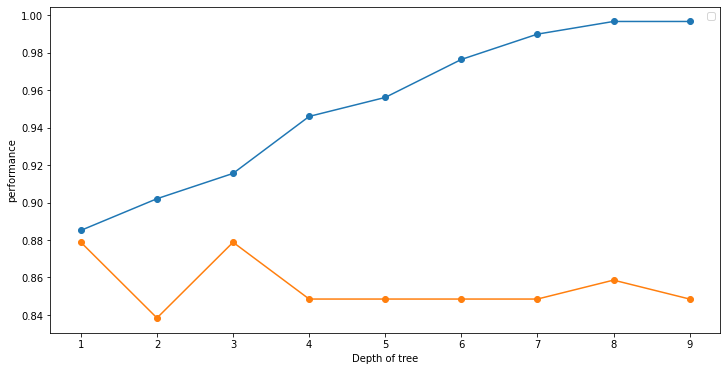

In [56]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()

In [57]:
dt_model = DecisionTreeClassifier(max_depth=8, max_leaf_nodes=25, random_state=10)

In [58]:
#fitting the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=25, random_state=10)

In [59]:
from sklearn import tree
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [60]:
decision_tree = tree.export_graphviz(dt_model,out_file='tree.dot',feature_names=X_train.columns,max_depth=2,filled=True)
!dot -Tpng tree.dot -o tree.png

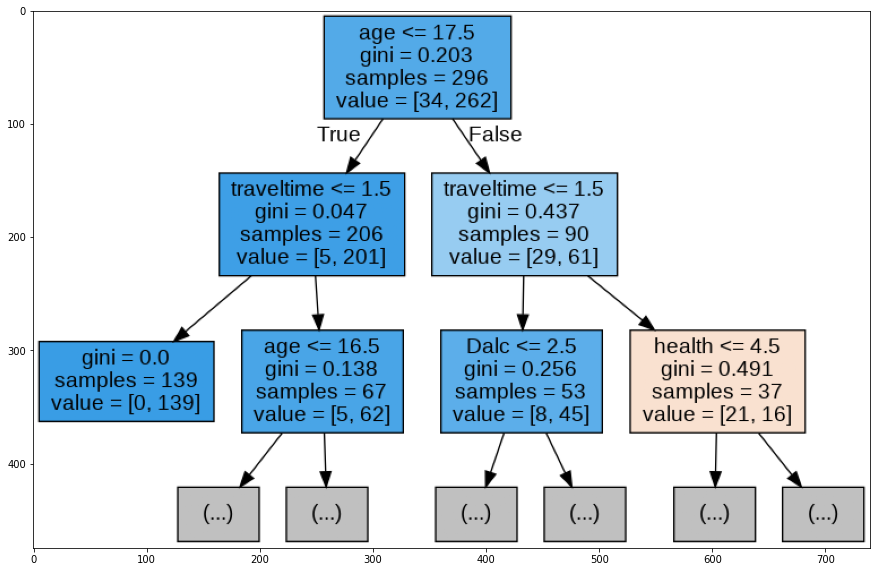

In [61]:
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)